<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/09c-logistic-regression-iris.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>


# 09c -- Logistic regression with the iris dataset

* [Generalized linear model (GLM)](https://en.wikipedia.org/wiki/Generalized_linear_model) -- wikipedia
* [ISLR 1st Edition](https://www.statlearning.com/) -- statlearning.com
* [Logistic regression 3-class classifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html) (iris dataset) -- scikit-learn.org
* [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) -- wikipedia

## Generalized linear model (GLM)

* GMLs are flexible generalizations of ordinary linear regression
* Ordinary linear regression:
  * $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon$
  * Expected value of the response $y$ depends linearly on the predictors, $x_p$
  * Errors have a normal distribution
* GLM:
  * Response relates to linear predictors with a nonlinear function
  * Appropriate for models that predict probability of a yes/no choice
* Model of binary events
  * Response variable has a Bernoulli distribution (response takes value 1 with probability "p")
  * Odds vs probability (we'll be modeling odds ratio)...
    * Consider a model that predicts whether you'll go to the beach   
    * Suppose the odds of going double with every 10-degree temperature rise
    * If it's 75 degrees and the probability of going is 0.75
    * Temperature rise to 85 degrees doubles the odds, not the probability
    * Odds go from 2:1 to 4:1, then to 8:1
    * Probability goes from 2/3 to 4/5 to 8 / 9
  * For binary events, we use the odds ratio $ \frac{p}{1-p}$




# Logit model

For linear regression
$$
y = \beta_0 + \beta_1 x
$$
and
$$
d_i = y_i + \epsilon_i
$$
Warning: notation can become confusing. We're using subscripts for the regression coefficients $\beta_i$. There are $p+1$ of these, where $p$ is the number of features in the model. We are also using subscripts for the data samples, and there are $N$ of these.

Note that with linear regression, $y$ can take on any value from $- \infty $ to $+ \infty$. With logistic regression, we're modeling classes that have one of two values, yes/no or 0/1 or the equivalent. The data can take on one of these values with a certain probability that varies between 0 and 1. With logistic regression, we model the log-odds as a linear function of $y = \beta_0 + \beta_1 x$. 
$$
\mathrm{log} \left( \frac{p}{1-p} \right) = \mathrm{logit}(p) = y
$$
Since p can vary from 0 to 1, the log odds varies from $- \infty $ to $+ \infty$.
This is where the term logistic regression comes from. We're "fitting" a line to the log-odds. 


We can solve this equation for $p(y)$
$$
p(y) = \frac{1}{1 + e^{-y}} = \mathrm{sigmoid(y)}
$$

Here's the rub: $p$ is a conditional probability. Specifically, $p(1|x)$ is the probability that the true class is 1 given the observation $x$.

## Cost function

With least-squares linear regression, we choose the regression coefficients that minimize the MSE.
In other words, with linear regression (ordinary least squares), the best solution is the one that minimizes the sum of squared residuals

$$
J(\beta_0, \beta_1) = \sum_{i=1}^N (y_i - d_i)^2
$$
Note: the subscripts on the right-hand side are the measurement index -- notation can be confusing.

With logistic regression, we choose the $\beta_0$ and $\beta_i$ that maximize the likelihood that our model is the correct one given the data we observed.

$$
L(\beta_0, \beta_1) = \prod_{i=1}^N p_i^{d_i}(1-p_i)^{1 - d_i}
$$

Minimizing the likelihood is equivalent to minimizing a cost function equal to minus the log of the likelihood

$$
J(\beta_0, \beta_1) = \sum_{i=1}^N \left( d_i \mathrm{log}(p_i) 
+ (1-d_i)\mathrm{log} (1-p_i) \right)
$$

Note that the contribution to the sum depends on the measured value of $d_i$, which is the label of the training data that has a value of 0 or 1. 
* If you measure $d_i = 1$, then $\mathrm{log}(p_i)$ contributes to $J$ and you want to make $p_i$ close to 1 so that $\mathrm{log}(p_i)$ is close to zero. 
* If you measure $d_i = 0$, then $\mathrm{log}(1-p_i)$ contributes to $J$ and you maximize it by making p small.

Although the two cost functions $J$ look very different, in fact
they're closely related.
If the errors in linear regression have a normal distribution, then the least-squares solution is also the maximum likelihood solution. You can see this by noting the form of the normal distribution. The numerator of the exponential is the square of the random error...

$$
\frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{(x - \mu)^2}{2\sigma^2}}
$$

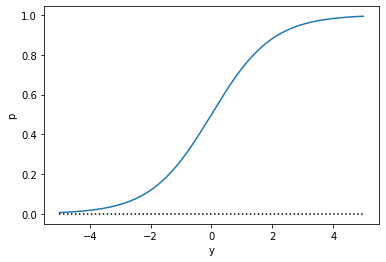

In [1]:
# Plotting sigmoid(y)
import matplotlib.pyplot as plt
import numpy as np

y = np.arange(-5,5,.01)
p = 1 / (1 + np.exp(-y))

plt.plot(y, p)
plt.plot([-5, 5], [0, 0], ":k")
plt.ylabel("p")
plt.xlabel("y");

# Iris dataset

Load the dataset from scikit learn and verify things.

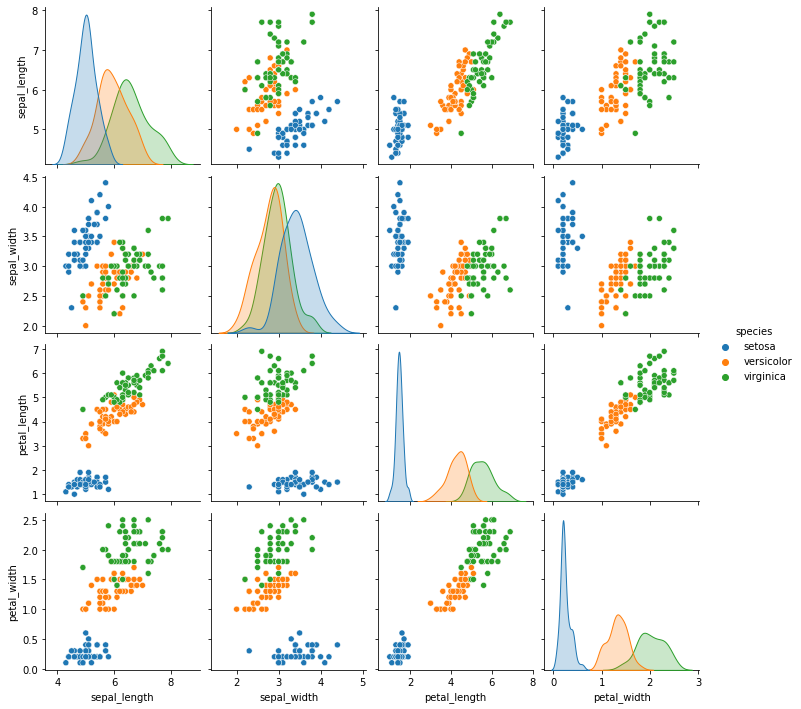

In [2]:
# Quickly load and visualize the data with seaborn
import seaborn as sns

df = sns.load_dataset("iris")

sns.pairplot(df, hue="species");

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 1-D Logistic Regression

* simplified logistic regression using 2 classes and 1 feature
* fit $y = \beta_0 + \beta_1 x$
* $y = \mathrm{logit}(p) = \mathrm{log}\left(\frac{p}{1-p}\right)$



In [4]:
# Extract data from the dataframe (classes are strings)
import pandas as pd

X = df.iloc[:, :2].values
Y = df['species'].values
Y = pd.factorize(Y)[0]

In [5]:
# Feature scaling -- it won't affect the solution, but makes plotting easier
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [6]:
# Pull out 1 feature
feature_index = 0
X_1D = np.expand_dims(X_std[:, feature_index], axis=1)
X_1D.shape

(150, 1)

In [7]:
# Only the first 2 classes (data are sorted by class, 50 samples each)
X_1D = X_1D[:100, :]
y_1D = Y[:100]

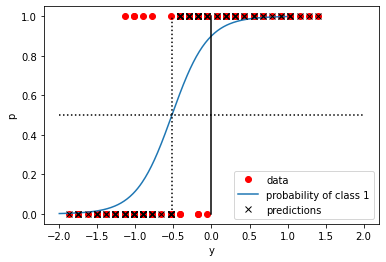

In [8]:
# 1-D logistic regression with scikit-learn
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e5)
lr.fit(X_1D, y_1D)
y_pred = lr.predict(X_1D)

# Plot data values with filled red circles
plt.plot(X_1D, y_1D, 'ro', label='data')

# Extract the weights from the model
beta_0 = lr.intercept_
beta_1 = lr.coef_[0]
x = np.arange(-2,1,.01)
y = beta_0 + beta_1 * x
p = 1 / (1 + np.exp(-y))

# Plot the probability of class 1
plt.plot(x, p, label='probability of class 1');

# Plot the predicted values from the data
plt.plot(X_1D, y_pred, 'xk', label='predictions')

# Plot the y-axis passing through the origin
plt.plot([0, 0], [0, 1], 'k')

# Plot the decision boundary (dotted vertical line)
# Note: this corresponds to p=.5, i.e., y=0, which is x= -beta_0/beta_1
x_0 = - beta_0 / beta_1
plt.plot([x_0, x_0], [0, 1], ':k')

# Plot the line y=.5 (dotted horizontal line)
plt.plot([-2, 2], [0.5, .5], ':k')
plt.legend()
plt.xlabel('y')
plt.ylabel('p');

# Multi-class Logistic Regression

* 2 features (only 2, so we can plot the 2-D decision region)
* 3 classes (all 3 iris species, as integers or strings)
* Multi-class uses the maximum probability from OVR (One-vs-Rest)

In [9]:
# Extract data from the dataframe (classes are strings)
import pandas as pd

Y = df['species'].values
X = df.iloc[:, :2].values

In [10]:
# Load and process data from scikit-learn
from sklearn import datasets

# Get the iris dataset from sklearn
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target # targets are integers

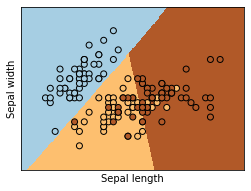

In [11]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Plotting below requires integer target variables (for colors)
# However, sklearn algorithm handles categorical variables automagically
if isinstance(Y[0], str):
  print("Converting strings to integers for plotting")
  Z = pd.factorize(Z)[0]
  Y = pd.factorize(Y)[0]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(());

# Regularization

Regularization adds a penalty for large $\beta_i$ (model coefficients).

Ridge regression adds a penalty term for the size (squared magnitude -- L2 norm) of the coefficients.

$$
J' = J + \frac{1}{C} \sum_{i=0}^p \beta_i^2
$$

LASSO adds a penalty term for the size (absolute value -- L1 norm) of the coefficients.

$$
J' = J + \alpha \sum_{i=0}^p | \beta_i |
$$

Scikit-learn has regularization turned on by default. Statsmodels does not.

# Why regularize?

It's all about model selection, the bias-variance tradeoff, and the desire to limit model complexity.

Review: [07-Modeling2-validation.ipynb](https://github.com/ds5110/summer-2021/blob/master/07-Modeling2-validation.ipynb)

<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/05.03-bias-variance.png" >

<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/05.03-bias-variance-2.png" >

Figure credit: [05.03-Hyperparameters-and-Model-Validation.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb) VanderPlas -- github



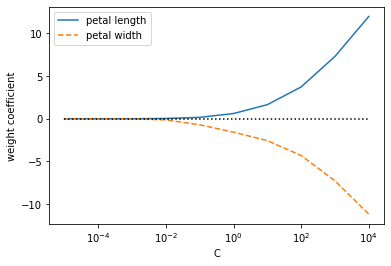

In [12]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1)
    lr.fit(X, Y)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend()
plt.xscale('log')
plt.plot(params, 0 * np.array(params), ':k');

# LASSO vs Ridge Regression

LASSO (Least Absolute Shrinkage and Selection Operator) penalizes the sum of absolute values (L1 norm) of the model coefficients, whereas ridge regression penalizes the sum of squared magnitudes (L2 norm).

The distinction has implications for model selection. LASSO tends to successively zero-out coefficients. Ridge regression successively reduces all of them.

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch04/images/04_04.png" width="400"/>

## L2

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch04/images/04_05.png" width="400"/>

## L1 

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch04/images/04_06.png" width="400"/>

Figure credits: Raschka's [ch04.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch04/ch04.ipynb)


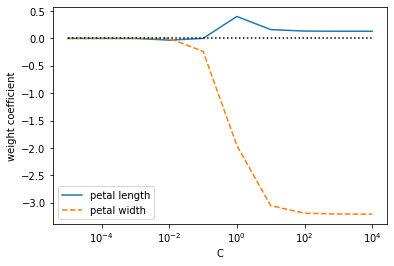

In [13]:
# L1 norm requires a special "solver"
# maximum iterations increased from default (100)
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, penalty="l1", 
                            solver="liblinear", max_iter=int(1e6), 
                            random_state=1)
    lr.fit(X, Y)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend()
plt.xscale('log')
plt.plot(params, 0 * np.array(params), ':k');

# Hyperparameter tuning

How do decide on the optimal value for "C"?

Reading: [05.03-Hyperparameters-and-Model-Validation.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)

In [14]:
# Convenience function to create a random dataset
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

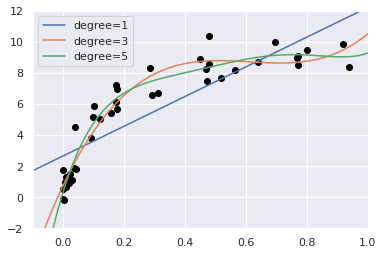

In [17]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

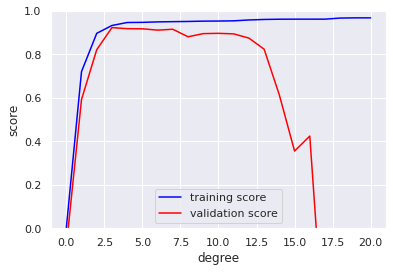

In [18]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Look for the "best" value for "degree" from the learning curve (degree = 3 in this case)

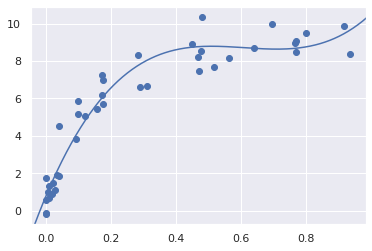

In [19]:
# Look for the "best" value from the learning curve (3 in this case)
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Validation curve depends on dataset size

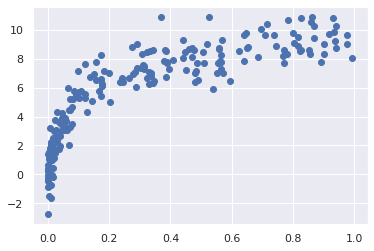

In [20]:
# Create a larger dataset with the same properties
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

Compare validation curves for two different dataset sizes

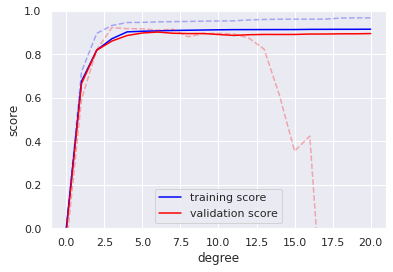

In [21]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

# Learning curve

A model of given complexity will...

* Overfit a small dataset -- training score greatly exceeds validation score  (high variance)
* Underfit a large dataset -- increasing dataset size will decrease training score will while increasing validation score
* Never have training score less than validation score -- lines will never cross


<img src="https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks/figures/05.03-learning-curve.png" >


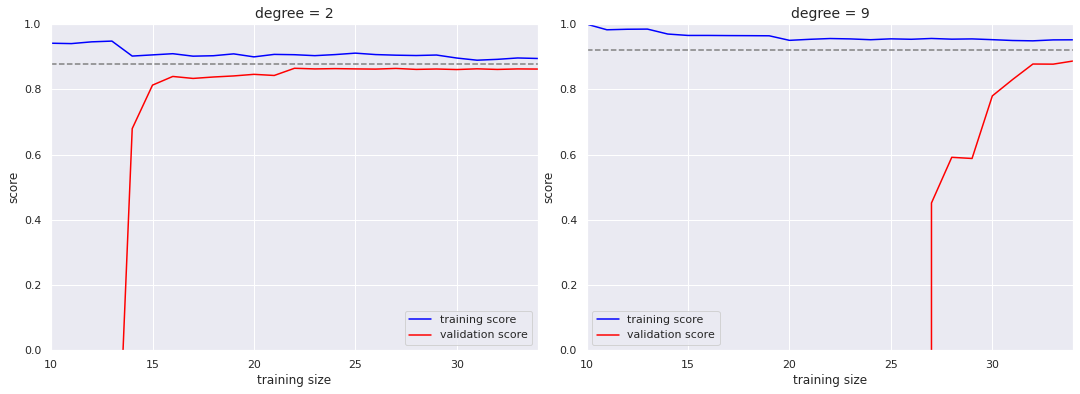

In [22]:
# Demonstrating the behavior for the polynomial fit on the original dataset
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

# Hyperparameter selection in practice -- GridSearch

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [24]:
grid.fit(X, y);

In [25]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

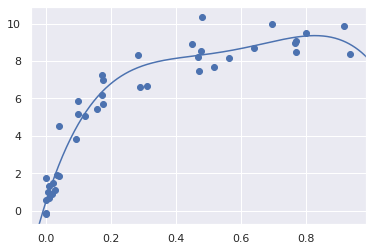

In [26]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);